# Comparing Logistic Regression and SVM

## Load Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import svm
%matplotlib inline

## Class

We need to build a class which will able to handle multiple machine learning algorithm. 

In [15]:
# Define Class
class Model():

    def __init__(self, filename):
        '''
        filename: csv file name
        '''
        # Private Variables
        # Dataframe
        self._df = pd.DataFrame()
        # List of Cofusion Matrix
        self._confusion_matrix = []
        # Load Data
        self.load_data(filename)
        pass

    def load_data(self, filename):
        '''
        filename: Read CSV
        '''
        # Read CSV File to DataFrame
        self._df = pd.read_csv(filename)
        pass

    def print_df_info(self):
        # Print Head of DataFrame
        print(self._df.head())
        pass

    def change_column_names(self, new_column_names):
        '''
        new_column_names: List, new names for columns
        '''
        # Change Columns of DataFrame
        # Assign new_column_names to Columns of DataFrame
        self._df.columns = new_column_names

    def set_features(self, feature_cols):
        '''
        feature_cols: List, features columns
        '''
        # Define a private variable _feature_col and assign feature_cols to _feature_col
        # Define _X, assign values of feature column to _X
        self._feature_col = feature_cols
        self._X = self._df[self._feature_col]

    def set_target(self, target_col):
        '''
        target_col: String, Name of Target Column
        '''
        # Define a private variable _target_col and assign target_col to _target_col
        # Define _y, assign values of feature column to _X
        self._target_col = target_col
        self._y = self._df[target_col]

    def train_and_test_logreg(self):
        '''
        Logistic Regression Model
        '''
        # Split Data        
        self.split_data()
        # Logistic Regression
        self._logreg = LogisticRegression()
        # Fit Model
        self._logreg.fit(self._X_train, self._y_train)
        # Store Predict in _y_pred
        self._y_pred=self._logreg.predict(self._X_test)
        # Store Confusion Matrix in _confusion_matrix using `metrics`
        self._confusion_matrix = metrics.confusion_matrix(self._y_test, self._y_pred)
        self._y_pred_proba = self._logreg.predict_proba(self._X_test)[::,1]
        pass

    def train_and_test_svm(self):
        '''
        Suppert Vector Machine Model
        '''
        # Split Data
        self.split_data()
        # SVC
        self._SVC = svm.SVC(gamma=0.001, C=100., probability=True)
        # Fit 
        self._SVC.fit(self._X_train, self._y_train)
        # Store Predict in _y_pred
        self._y_pred = self._SVC.predict(self._X_test)
        # Store Confusion Matrix in _confusion_matrix using `metrics`
        self._confusion_matrix = metrics.confusion_matrix(self._y_test, self._y_pred)
        # Store predict_proba Matrix in _y_pred_proba using `predict_proba`
        self._y_pred_proba = self._SVC.predict_proba(self._X_test)[::,1]
        pass

    def print_confusion_matrix(self):
        # Print Cofusion Matrix
        print(f'Confusion matrix:')
        print(f'TP: {self._confusion_matrix[1][1]}, FP: {self._confusion_matrix[0][1]}')
        print(f'FN: {self._confusion_matrix[1][0]}, TN: {self._confusion_matrix[0][0]}')
        pass

    def print_evaluation_metrics(self):
        # Print accuracy_score, precision_score, recall_score
        print("Accuracy:", metrics.accuracy_score(self._y_test, self._y_pred))
        print("Precision:", metrics.precision_score(self._y_test, self._y_pred))
        print("Recall:", metrics.recall_score(self._y_test, self._y_pred))
        pass

    def split_data(self):
        # Split _X, _y _X_train, _X_test, _y_train, _y_test to using train_test_split
        self._X_train, self._X_test, self._y_train, self._y_test = train_test_split(
            self._X, self._y, test_size=0.25, random_state=0)
        pass

    def plot_confusion_materix(self):
        '''
        Print HeatMap of `self._confusion_matrix`
        '''
        class_names=[1,0] # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(self._confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.xlabel('Actual label')
        plt.ylabel('Predicted label')
        pass

    def plot_roc_curve(self):
        '''
        Plot ROC Curve of _y_test, y_pred_proba using `metrics`
        '''
        y_pred_proba = self._y_pred_proba
        fpr, tpr, _ = metrics.roc_curve(self._y_test,  y_pred_proba)
        auc = metrics.roc_auc_score(self._y_test, y_pred_proba)
        plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
        plt.legend(loc=4)
        plt.show()
        pass

In [25]:
''' 
    analysying diabetes data 
'''
filename = '../DATA/diabetes.csv'
model = Model(filename)
column_names = ['pregnant', 'glucose', 'bp', 'skin',
                'insulin', 'bmi', 'pedigree', 'age', 'label']
model.change_column_names(column_names)

In [27]:
model.print_df_info()

feature_cols = ['pregnant', 'insulin', 'bmi',
                'age', 'glucose', 'bp', 'pedigree']
model.set_features(feature_cols)
model.set_target('label')

   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1


>>>>>>>>>>>>>>>>>>>> Applying Logistic Regression
Confusion matrix:
TP: 36, FP: 11
FN: 26, TN: 119
Accuracy: 0.8072916666666666
Precision: 0.7659574468085106
Recall: 0.5806451612903226


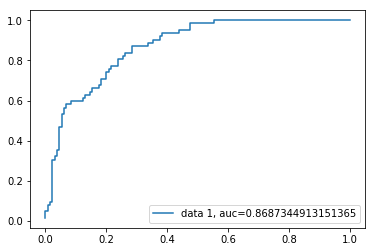

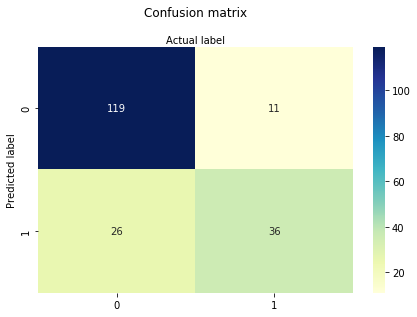

In [28]:
print(20 * '>', 'Applying Logistic Regression')
model.train_and_test_logreg()
model.print_confusion_matrix()
model.print_evaluation_metrics()
model.plot_roc_curve()
model.plot_confusion_materix()

>>>>>>>>>>>>>>>>>>>> Applying SVM
Confusion matrix:
TP: 31, FP: 25
FN: 31, TN: 105
Accuracy: 0.7083333333333334
Precision: 0.5535714285714286
Recall: 0.5


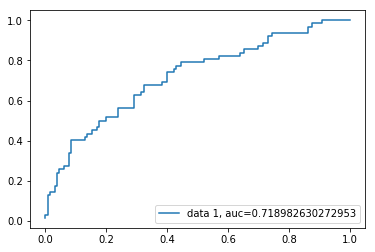

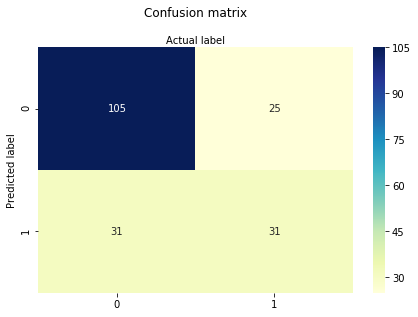

In [22]:
print(20 * '>', 'Applying SVM')
model.train_and_test_svm()
model.print_confusion_matrix()
model.print_evaluation_metrics()
model.plot_roc_curve()
model.plot_confusion_materix()